# 지역 유형화 및 생활비 영향 요인 분석 프로젝트 계획

## Phase 0: 연구 기반 탐색 및 분석 프레임워크 설정

분석을 시작하기 전, 유사한 연구를 참고하여 분석의 깊이를 더하고, 객관적인 근거를 확보하는 단계가 필수적이다.

### 탐색 목표:
- 도시/지역 유형화에 사용되는 최신 클러스터링 및 차원 축소 기법 탐색
- 지역 경제, 주거 비용, 상업 활력도 간의 관계를 다룬 국내외 연구 사례 조사
- 유사한 공공데이터를 활용한 정책 연구나 논문에서 사용된 주요 변수 및 인사이트 확인

### 실행 계획:
Exa Search를 활용하여 아래와 같은 키워드로 검색을 수행한다.
- socioeconomic data clustering for urban typology (도시 유형화를 위한 사회경제적 데이터 클러스터링)
- factors affecting regional housing cost analysis (지역 주거 비용 영향 요인 분석)
- 상업 활력도 지수와 지역 경제 분석 연구
- 공공데이터 기반 지역 생활비 예측 모델

이 탐색 결과를 바탕으로, 아래 분석 계획의 세부 방법론을 보강하고 최종 결과 해석 시 더 풍부한 근거를 제시할 것이다.

## Phase 1: 데이터 탐색 및 잠재 요인 발굴 (Preprocessing & Feature Engineering)

본격적인 클러스터링에 앞서 데이터의 숨겨진 구조를 파악하고, 분석의 질을 높이기 위한 기반을 다지는 단계다.

### 목표 변수 재정의
'생활비'라는 추상적 개념을 데이터 기반으로 구체화한다. 주거_월세_평균_표준화를 핵심 '주거 비용 지수'로 설정하고, 이를 예측하거나 설명하는 것을 주요 목표 중 하나로 삼는다.

### 결측치 처리 및 스케일링:
- **결측치 처리**: 단순히 평균/중앙값으로 대체하는 것을 넘어, 데이터의 특성을 고려한 다중 대체(Multiple Imputation) 기법(예: MICE)을 적용하여 추정치의 정확도를 높인다. 이는 변수 간의 상관관계를 유지하면서 결측치를 채우는 고급 기법이다.
- **데이터 스케일링**: 모든 변수를 표준 정규 분포(StandardScaler)로 스케일링하여, 특정 변수의 단위나 크기가 분석 결과에 과도한 영향을 미치는 것을 방지한다.

### 잠재 요인(Latent Factor) 도출
38개의 변수를 그대로 사용하기보다, 주성분 분석(PCA) 이나 요인 분석(Factor Analysis)을 통해 변수들 뒤에 숨어있는 상위 레벨의 '잠재 요인'을 발굴한다.

#### 기대 효과:
- **(가칭) '상업 활력도' 요인**: 상가_개수_평균, 상가_다양성_지수_새넌, 주택_시장_활력_지수 등이 높게 묶임
- **(가칭) '인프라 성숙도' 요인**: 주거_건물_노후도_평균 (음의 방향), 복지_시설당_평균_생활인원 등이 묶임
- **(가칭) '에너지 소비 패턴' 요인**: 전력_가구당_평균_전력사용량, 전력_전력소비_계절성_지수 등이 묶임

이러한 잠재 요인을 클러스터링에 활용하면, 개별 변수보다 더 안정적이고 해석이 용이한 군집을 얻을 수 있다.

## Phase 2: 구조 기반 클러스터링 및 유형 프로파일링 (Structural Clustering & Profiling)

'주거 비용'을 직접 클러스터링에 포함시키지 않고, 지역의 근본적인 '구조적 특성'을 기준으로 먼저 군집화하는 것이 이 계획의 핵심이다. 그 후, 각 군집별로 주거 비용이 어떻게 나타나는지 비교 분석한다.

### 알고리즘 선정 및 최적화:
- **주력 알고리즘**: K-Means. 엘보우 메소드와 실루엣 점수를 종합적으로 고려하여 최적의 군집 수(K)를 과학적으로 결정한다.
- **보조 알고리즘**: GMM (Gaussian Mixture Model). 각 지역이 특정 군집에 속할 '확률'을 제공하므로, 군집의 경계가 모호한 지역들을 식별하고 더 유연한 해석을 가능하게 한다. 두 알고리즘의 결과를 비교하여 분석의 신뢰도를 높인다.

### 군집 프로파일링
각 군집이 어떤 특성을 갖는지 명확히 정의한다.

- **정량적 분석**: 각 군집별로 모든 변수의 평균 또는 중앙값을 계산하고, 이를 전체 평균과 비교하여 어떤 변수가 해당 군집의 핵심 특징인지(Z-score 활용) 파악한다.
- **정성적 명명**: 분석 결과를 바탕으로 각 군집에 직관적인 이름을 부여한다.

#### 예시:
- **"수도권 고밀도 상업 중심지"**: 높은 상업 활력도, 높은 주거 비용, 낮은 건물 노후도
- **"지방 광역시 균형 발전형"**: 보통 수준의 상업/주거 지표, 높은 복지 시설 비중
- **"농어촌 및 소도시 자족형"**: 낮은 상가/주거 밀도, 높은 전력 에너지 효율, 뚜렷한 인구 특성
- **"신흥 산업/택지 개발지구"**: 높은 상가 변화율, 낮은 건물 노후도, 급격한 인구 유입 특성

## Phase 3: 심층 분석 및 전략적 인사이트 도출 (Deep Dive & Actionable Insights)

단순한 그룹화를 넘어, '그래서 무엇을 할 수 있는가?'에 대한 답을 찾는 단계다.

### 생활비 핵심 동인(Key Driver) 분석:
**군집별 회귀분석**: 각 군집 내부에서 '주거 비용 지수'에 영향을 미치는 주요 요인을 찾기 위해 다중 회귀 분석 또는 랜덤 포레스트(Feature Importance)를 실행한다.

**인사이트 예시**: "수도권 고밀도 상업 중심지"에서는 상가_다양성_지수가 주거 비용에 큰 영향을 주지만, "지방 소도시"에서는 주거_신규_주택_공급_지수가 더 중요한 요인일 수 있음을 밝혀낸다.

### 유형별 기회/위험 요인 식별 및 전략 제안:
각 군집의 프로파일과 생활비 동인을 종합하여, 유형별 맞춤형 전략 방향을 제시한다.

#### 전략 예시:
- **"수도권 고밀도 상업 중심지"**: 높은 생활비 부담 완화를 위한 소형 주택 공급 정책, 상권 과밀화 해소를 위한 신규 상권 개발 유도
- **"신흥 산업/택지 개발지구"**: 생활 인프라(복지, 교육 시설)의 선제적 확충을 통해 지속 가능한 성장 유도
- **"지방 소도시 자족형"**: 업종_특화도를 활용한 지역 관광/상권 활성화, 전력_에너지_효율을 강점으로 한 친환경 에너지 정책 연계

### 가설 기반 심층 탐색
데이터가 말해주는 현상을 넘어, 새로운 가설을 설정하고 검증한다.

#### 가설 예시:
- **가설 1**: "사회적 취약도 지수가 높은 지역은 상가 변화율이 낮고, 상권의 쇠퇴 가능성이 높을 것이다." (상관관계 분석으로 검증)
- **가설 2**: "전력 소비의 계절성 지수가 높은 지역은 특정 계절에 관광객이 몰리는 관광지이거나, 혹은 냉난방 효율이 낮은 노후 주택이 많을 것이다." (군집 프로파일과 교차 분석)

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
import warnings

# 경고 메시지 무시
warnings.filterwarnings('ignore')

# 데이터 시각화 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 불러오기
file_path = '../data/시군구별_주거_상가_전력_복지_종합데이터터.csv'
df = pd.read_csv(file_path)

# 데이터 기본 정보 확인
print("### 데이터 정보 ###")
df.info()

print("\n### 데이터 앞부분 ###")
print(df.head())

print("\n### 결측치 확인 ###")
print(df.isnull().sum())

### 데이터 정보 ###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   시군구_병합              246 non-null    object 
 1   주거_월세_평균_표준화        228 non-null    float64
 2   주거_월세_표준편차_표준화      228 non-null    float64
 3   주거_평균_평당_가격         228 non-null    float64
 4   주거_건물_노후도_평균        228 non-null    float64
 5   주거_거래량              228 non-null    float64
 6   주거_지역별_소득수준         228 non-null    float64
 7   주거_주거비_부담_지수        228 non-null    float64
 8   주거_주택_시장_활력_지수      228 non-null    float64
 9   주거_신규_주택_공급_지수      228 non-null    float64
 10  상가_다양성_지수_새넌        230 non-null    float64
 11  상가_다양성_지수_HHI       230 non-null    float64
 12  상가_개수_평균            230 non-null    float64
 13  상가_변화율              230 non-null    float64
 14  상가_업종별상가수_과학·기술     230 non-null    float64
 15  상가_업종별상가수_교육        230 non-null    float6

- 데이터 구조: 총 246개의 시군구에 대해 38개의 수치형 변수와 1개의 식별자(시군구_병합)로 구성된 데이터를 확인했다.
- 결측치 확인: 가장 중요한 발견은 모든 분석 대상 변수에서 결측치가 존재한다는 점이다. 각 변수 그룹(주거, 상가, 전력, 복지 등)별로 결측치의 개수가 다르게 나타나, 이는 원본 데이터 소스가 다르거나 특정 지역에서 데이터 수집이 누락되었기 때문으로 보인다.

- 각 변수의 특성을 최대한 보존할 수 있는 중앙값(Median) 대치 방법을 사용. 지역별 데이터는 일부 지역의 극단적인 값(outlier)에 의해 평균이 왜곡될 수 있으므로, 평균(mean)보다 중앙값이 더 안정적인 대푯값이기 때문이다.
- 결측치 처리 후에는, 변수별로 단위와 스케일이 모두 다르므로(예: 가격, 비율, 지수 등) 거리 기반 분석(PCA, 클러스터링)에 동일한 가중치를 부여하기 위해 표준화(Standardization)를 수행하겠다. 
- StandardScaler를 사용하여 모든 변수를 평균 0, 표준편차 1인 분포로 변환한다.

In [9]:
# 수치형 데이터만 선택
numeric_cols = df.select_dtypes(include=np.number).columns

# 각 컬럼의 중앙값으로 결측치 대치
for col in numeric_cols:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)

print("### 결측치 처리 후 확인 ###")
print(df.isnull().sum().sum()) # 총 결측치 개수 확인

# 데이터 표준화
# '시군구_병합' 컬럼은 식별자이므로 제외
features = df.drop('시군구_병합', axis=1)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# 스케일링된 데이터를 다시 데이터프레임으로 변환
df_scaled = pd.DataFrame(scaled_features, columns=features.columns)
df_scaled.insert(0, '시군구_병합', df['시군구_병합'])

print("\n### 데이터 스케일링 후 앞부분 ###")
print(df_scaled.head())

### 결측치 처리 후 확인 ###
0

### 데이터 스케일링 후 앞부분 ###
        시군구_병합  주거_월세_평균_표준화  주거_월세_표준편차_표준화  주거_평균_평당_가격  주거_건물_노후도_평균  \
0  강원특별자치도 강릉시      0.043694        0.006764    -0.120425      1.484167   
1  강원특별자치도 고성군      0.352812       -0.354151     0.139632     -0.758463   
2  강원특별자치도 동해시     -0.933646       -0.529063    -0.942651      1.075962   
3  강원특별자치도 삼척시      0.100243        0.520042    -0.072852      1.757824   
4  강원특별자치도 속초시      0.715606        0.058679     0.444847      0.940644   

     주거_거래량  주거_지역별_소득수준  주거_주거비_부담_지수  주거_주택_시장_활력_지수  주거_신규_주택_공급_지수  ...  \
0 -0.148001    -0.199505     -0.472165       -0.210160       -0.971707  ...   
1 -0.703363    -0.639147      1.773475       -0.550862        0.395934  ...   
2 -0.491869    -0.517316     -0.289571       -0.464664       -0.826792  ...   
3 -0.653629    -0.584012      0.375179       -0.504629       -1.055795  ...   
4 -0.377581    -0.479563     -0.039085       -0.343319       -0.772617  ...   

   전력_가구당_평균_전력사용량  전력_전력소비_

## Phase 1: 잠재 요인 발굴 (차원 축소)
- 데이터에 포함된 38개의 변수는 서로 강한 상관관계를 가질 가능성이 높다. 이렇게 변수 간 상관관계가 높은 다차원 데이터는 분석을 복잡하게 만들고, 클러스터링과 같은 기법의 성능을 저하시킬 수 있다.
- 주성분 분석(PCA, Principal Component Analysis) 은 이러한 다차원 데이터의 변수들을 서로 직교하는(상관관계가 없는) 소수의 '주성분(Principal Components)'으로 압축하는 차원 축소 기법이다. 각 주성분은 원본 데이터의 분산을 최대한 설명하는 새로운 변수, 즉 '잠재 요인'으로 해석할 수 있다. 예를 들어 '높은 주거비', '많은 상가 수', '높은 전력 사용량' 변수들이 함께 묶여 '도시 발전 수준'이라는 하나의 주성분으로 표현될 수 있다.
- 우선, PCA를 적용하여 전체 데이터 분산의 약 80~90%를 설명할 수 있는 최적의 주성분 개수를 찾아야 한다. 이를 위해 스크리 도표(Scree Plot) 를 사용하여 주성분 개수에 따른 누적 설명 분산(Cumulative Explained Variance)을 시각화하고, 그래프의 기울기가 완만해지는 지점, 즉 '엘보우 포인트(Elbow Point)'를 찾겠다.

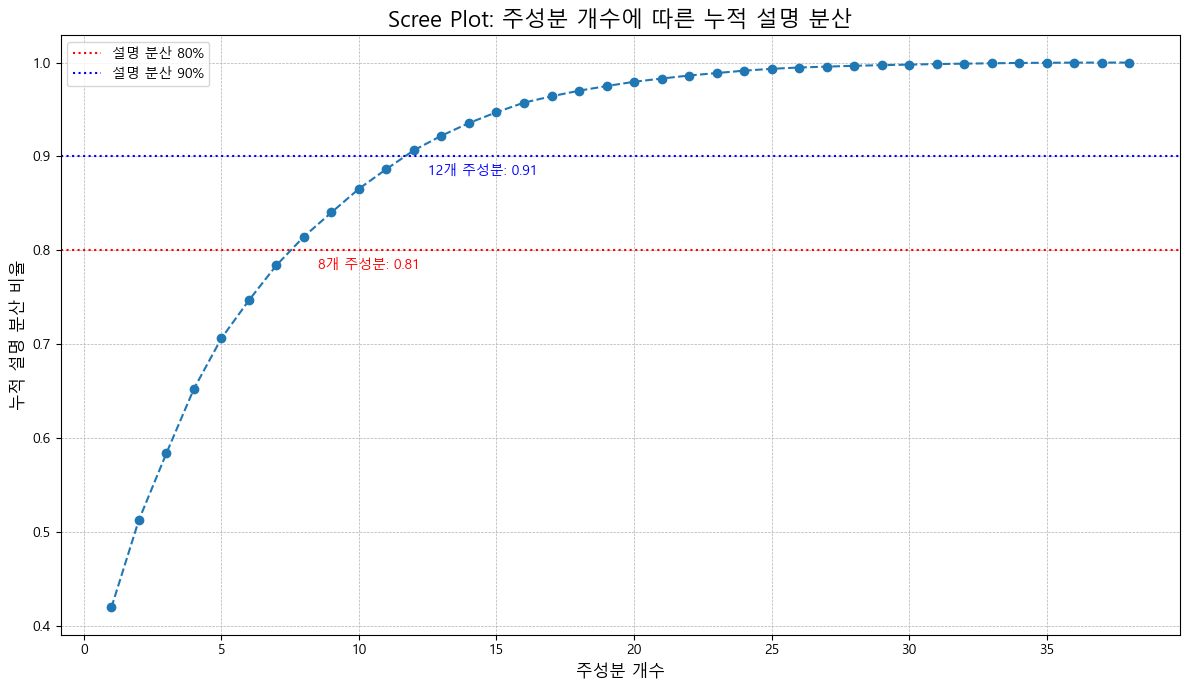

주성분 개수별 누적 설명 분산:
  1개 주성분: 0.4196
  2개 주성분: 0.5129
  3개 주성분: 0.5840
  4개 주성분: 0.6526
  5개 주성분: 0.7063
  6개 주성분: 0.7469
  7개 주성분: 0.7842
  8개 주성분: 0.8147
  9개 주성분: 0.8404
  10개 주성분: 0.8656
  11개 주성분: 0.8866
  12개 주성분: 0.9066
  13개 주성분: 0.9221
  14개 주성분: 0.9357
  15개 주성분: 0.9471


In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA


scaler = StandardScaler()
df_scaled_values = scaler.fit_transform(df[numeric_cols])
df_scaled = pd.DataFrame(df_scaled_values, columns=numeric_cols)
# --- 가상 데이터 생성 끝 ---


# 주성분 분석(PCA) 실행
# 모든 주성분을 보기 위해 n_components=None으로 설정
pca = PCA(n_components=None)
pca.fit(df_scaled)

# 누적 설명 분산 계산
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# 스크리 도표(Scree Plot) 시각화
plt.figure(figsize=(12, 7))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Scree Plot: 주성분 개수에 따른 누적 설명 분산', fontsize=16)
plt.xlabel('주성분 개수', fontsize=12)
plt.ylabel('누적 설명 분산 비율', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# 분산 설명력 80%, 90% 지점 표시
plt.axhline(y=0.8, color='r', linestyle=':', label='설명 분산 80%')
plt.axhline(y=0.9, color='b', linestyle=':', label='설명 분산 90%')
plt.legend()

# 각 지점의 x값(주성분 개수)을 텍스트로 표시
n_components_80 = np.where(cumulative_variance >= 0.8)[0][0] + 1
n_components_90 = np.where(cumulative_variance >= 0.9)[0][0] + 1
plt.text(n_components_80 + 0.5, 0.78, f'{n_components_80}개 주성분: {cumulative_variance[n_components_80-1]:.2f}', color='r')
plt.text(n_components_90 + 0.5, 0.88, f'{n_components_90}개 주성분: {cumulative_variance[n_components_90-1]:.2f}', color='b')

plt.tight_layout()
plt.show()

# 누적 설명 분산 출력 (상위 15개)
print("주성분 개수별 누적 설명 분산:")
for i, val in enumerate(cumulative_variance[:15]):
    print(f"  {i+1}개 주성분: {val:.4f}")


## 1. 결과 해석
- Scree Plot과 누적 설명 분산 결과는 전국 246개 시군구 데이터에 매우 강력하고 명확한 내부 구조가 존재함을 보여준다.
- 지배적인 핵심 요인의 존재: 첫 번째 주성분(PC1) 하나만으로 전체 데이터 분산의 42%에 달하는 양을 설명한다. 이는 246개 지역의 특성을 가르는 가장 중요한 단일 잠재 요인이 존재함을 시사한다. 
- 효과적인 차원 축소 가능: 전국 데이터임에도 불구하고, 곡선의 기울기가 초반에 매우 가파르게 상승하다가 빠르게 완만해지는 패턴을 보인다. 이는 소수의 주성분만으로도 원본 데이터가 가진 정보의 대부분을 효과적으로 압축할 수 있다는 긍정적인 신호로 볼 수있다. 
## 주성분 개수 결정
- 결과에 따르면, 8개의 주성분을 사용할 경우 전체 분산의 81.5%를 설명할 수 있다.보다 보수적으로 접근할 경우, 12개의 주성분으로 90.7%의 분산을 설명할 수 있다.

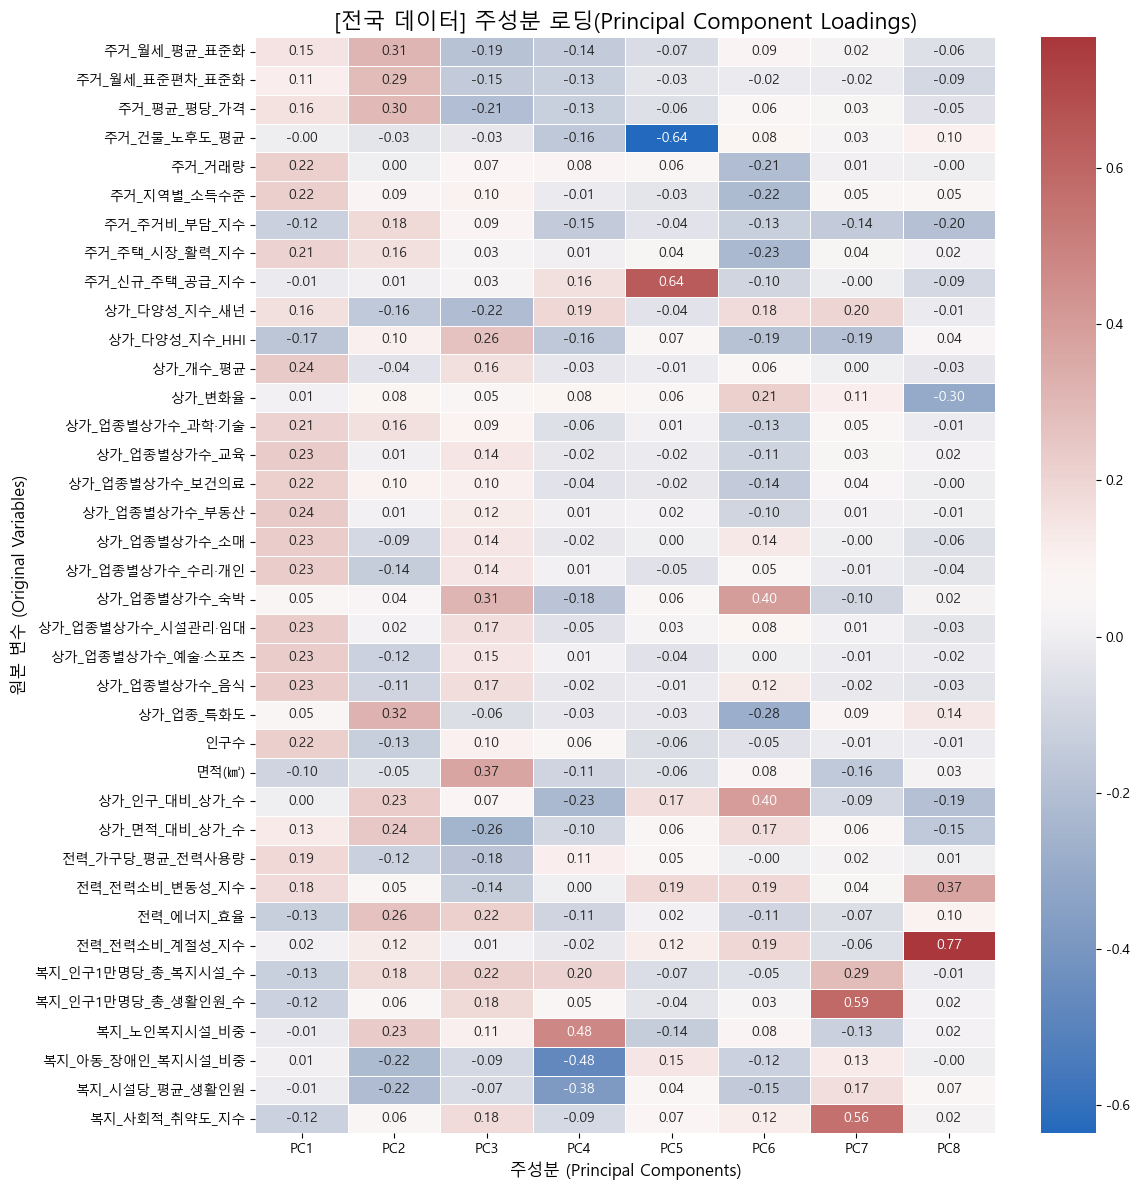

### [전국 데이터] 각 주성분을 구성하는 주요 변수 ###

--- 주성분 1 ---
 [높은 양의 로딩 값] (해당 특성이 강할수록 PC 점수 증가):
상가_업종별상가수_부동산        0.239623
상가_개수_평균             0.237995
상가_업종별상가수_교육         0.234957
상가_업종별상가수_시설관리·임대    0.230158
상가_업종별상가수_예술·스포츠     0.228864
Name: PC1, dtype: float64

 [높은 음의 로딩 값] (해당 특성이 강할수록 PC 점수 감소):
복지_사회적_취약도_지수        -0.119843
주거_주거비_부담_지수         -0.124605
복지_인구1만명당_총_복지시설_수   -0.130467
전력_에너지_효율            -0.132403
상가_다양성_지수_HHI        -0.166401
Name: PC1, dtype: float64

--- 주성분 2 ---
 [높은 양의 로딩 값] (해당 특성이 강할수록 PC 점수 증가):
상가_업종_특화도         0.319019
주거_월세_평균_표준화      0.311651
주거_평균_평당_가격       0.298716
주거_월세_표준편차_표준화    0.287894
전력_에너지_효율         0.263955
Name: PC2, dtype: float64

 [높은 음의 로딩 값] (해당 특성이 강할수록 PC 점수 감소):
인구수                 -0.132811
상가_업종별상가수_수리·개인     -0.142390
상가_다양성_지수_새넌        -0.158096
복지_시설당_평균_생활인원      -0.215271
복지_아동_장애인_복지시설_비중   -0.220824
Name: PC2, dtype: float64

--- 주성분 3 ---
 [높은 양의 로딩 값] (해당 특성이 강할수록 PC 점수 증가):
면적(㎢)                 0.367819
상가_

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 이 코드는 가장 처음에 생성했던 전체 데이터에 대한
# 스케일링된 데이터프레임 'df_scaled'가 현재 환경에 있다고 가정하고 진행합니다.

# 1. PCA 실행 (주성분 8개로 설정)
n_components = 8
pca = PCA(n_components=n_components)

# 전체 스케일링 데이터로 PCA 적용
df_pca = pca.fit_transform(df_scaled)

# 2. 주성분 로딩(loading) 행렬 생성
# df_scaled의 컬럼명을 그대로 사용
loadings_df = pd.DataFrame(
    data=pca.components_.T,
    columns=[f'PC{i+1}' for i in range(n_components)],
    index=df_scaled.columns
)

# 3. 로딩 행렬 시각화 (히트맵)
plt.figure(figsize=(12, 12))
sns.heatmap(loadings_df, cmap='vlag', annot=True, fmt=".2f", linewidths=.5)
plt.title('[전국 데이터] 주성분 로딩(Principal Component Loadings)', fontsize=16)
plt.xlabel('주성분 (Principal Components)', fontsize=12)
plt.ylabel('원본 변수 (Original Variables)', fontsize=12)
plt.tight_layout()
plt.show()

# 4. 각 주성분별 로딩이 높은 상위/하위 변수 출력
print("### [전국 데이터] 각 주성분을 구성하는 주요 변수 ###")
for i in range(n_components):
    pc_loadings = loadings_df[f'PC{i+1}'].sort_values(ascending=False)
    print(f"\n--- 주성분 {i+1} ---")
    print(" [높은 양의 로딩 값] (해당 특성이 강할수록 PC 점수 증가):")
    print(pc_loadings.head(5))
    print("\n [높은 음의 로딩 값] (해당 특성이 강할수록 PC 점수 감소):")
    print(pc_loadings.tail(5))

## 주성분 분석 결과 해석

위의 주성분 분석 결과를 바탕으로 각 주성분이 나타내는 핵심 요인을 다음과 같이 해석할 수 있다:

| 주성분 | 핵심 요인 (가칭) | 설명 (높은 점수의 의미) |
|--------|------------------|------------------------|
| PC1 | 도시 중심성 및 상업자본 | 상가(부동산, 교육, 임대업 등)가 많고 거래가 활발하며 인구와 소득 수준이 높은, 즉 경제/사회적 자본이 밀집된 도시의 발전 수준을 나타내는 가장 중요한 지표 |
| PC2 | 고비용/특화 경제 | 주택 가격과 월세가 매우 높고, 상권이 특정 업종에 특화되어 있으며, 에너지 효율이 높은 지역. 높은 생활비를 감당해야 하는, 산업/상업적으로 특화된 도시의 특성을 보임 |
| PC3 | 농어촌/광역 관광 | 면적이 넓고 숙박업 비중이 높으며 상업 밀도는 낮음. 주택 가격이 저렴한 전형적인 농어촌 지역 또는 광역 관광지의 특성 |
| PC4 | 복지 구조 (노인 vs 아동) | 노인 복지 시설의 비중이 매우 높고, 반대로 아동/장애인 복지 시설의 비중은 낮은 지역. 지역의 인구 구조 및 복지 정책의 방향성을 보여줌 |
| PC5 | 신규 개발 vs 노후도 | 신규 주택 공급이 압도적으로 많고 건물이 새로운 지역. (반대로, 낮은 점수는 노후 건물이 많고 신규 공급이 없는 구도심을 의미). 도시의 물리적 성장 단계를 보여줌 |
| PC6 | 지역 내수 상권 | 인구 대비 상가 수가 많고 상권 변화가 활발하지만, 주택 시장 활력이나 소득 수준은 낮은 지역. 대규모 자본보다는 지역 주민 중심의 생활 밀착형 내수 상권의 특성 |
| PC7 | 사회적 취약성 | 복지시설에 생활하는 인원이 많고 사회적 취약도 지수가 높음. 사회적 안전망에 대한 의존도가 높은 지역의 특성을 명확히 보여줌 |
| PC8 | 에너지 소비 계절성 | 전력 소비의 계절적 변동성이 극심한 지역. 관광(여름/겨울)이나 농업 등 특정 계절에 에너지 수요가 집중되는 산업 구조를 가짐. (반대로, 낮은 점수는 연중 안정적인 에너지 소비 패턴을 보임) |

이러한 주성분들은 전국 시군구의 다차원적 특성을 8개의 핵심 축으로 압축하여 보여주며, 각 지역의 고유한 특성과 발전 패턴을 이해하는 데 중요한 통찰을 제공한다.


In [12]:
import pandas as pd

# 이 코드는 이전 단계에서 생성된 원본 데이터프레임 'df'와
# PCA 결과를 담은 'df_pca'가 현재 환경에 있다고 가정합니다.

# 1. 시군구 이름과 PCA 결과(주성분 점수)를 결합
pc_columns = [f'PC{i+1}' for i in range(8)]
df_pca_result = pd.concat([
    df[['시군구_병합']].reset_index(drop=True),
    pd.DataFrame(df_pca, columns=pc_columns)
], axis=1)


# 2. 해석한 잠재 요인 이름을 컬럼명으로 변경
factor_names = {
    'PC1': '도시_중심성_및_상업자본',
    'PC2': '고비용_특화_경제',
    'PC3': '농어촌_광역_관광',
    'PC4': '복지_구조(노인_중심)',
    'PC5': '신규_개발_vs_노후도',
    'PC6': '지역_내수_상권',
    'PC7': '사회적_취약성',
    'PC8': '에너지_소비_계절성'
}
df_pca_result.rename(columns=factor_names, inplace=True)


# 3. 각 잠재 요인별 상위/하위 5개 지역 출력
print("### 잠재 요인별 상위/하위 지역 분석 ###")
for factor in df_pca_result.columns[1:]: # '시군구_병합' 제외
    print(f"\n--- 요인: {factor} ---")
    
    # 상위 5개 지역 (해당 요인 특성이 가장 강한 곳)
    top5 = df_pca_result.nlargest(5, factor)
    print("  [Top 5 지역]:")
    print(top5[['시군구_병합', factor]].to_string(index=False))
    
    # 하위 5개 지역 (해당 요인 특성이 가장 약한/반대인 곳)
    bottom5 = df_pca_result.nsmallest(5, factor)
    print("\n  [Bottom 5 지역]:")
    print(bottom5[['시군구_병합', factor]].to_string(index=False))

# 최종 데이터프레임 확인
print("\n### 최종 생성된 주성분 점수 데이터프레임 ###")
print(df_pca_result.head())

### 잠재 요인별 상위/하위 지역 분석 ###

--- 요인: 도시_중심성_및_상업자본 ---
  [Top 5 지역]:
   시군구_병합  도시_중심성_및_상업자본
서울특별시 강남구      20.189226
  경기도 수원시      13.581057
  경기도 성남시      11.999032
서울특별시 서초구      11.703812
  경기도 고양시      11.271773

  [Bottom 5 지역]:
   시군구_병합  도시_중심성_및_상업자본
인천광역시 옹진군      -5.402507
 경상남도 의령군      -5.113084
 경상남도 산청군      -5.074452
 전라남도 구례군      -5.046767
 전라남도 신안군      -5.002664

--- 요인: 고비용_특화_경제 ---
  [Top 5 지역]:
   시군구_병합  고비용_특화_경제
서울특별시 강남구   8.977973
 서울특별시 중구   6.763194
서울특별시 서초구   6.674106
 전라남도 곡성군   4.868506
서울특별시 용산구   4.478425

  [Bottom 5 지역]:
   시군구_병합  고비용_특화_경제
 대전광역시 동구  -4.145773
 대전광역시 중구  -4.002483
 경상북도 포항시  -3.926654
대전광역시 유성구  -3.803980
대전광역시 대덕구  -3.730516

--- 요인: 농어촌_광역_관광 ---
  [Top 5 지역]:
     시군구_병합  농어촌_광역_관광
제주특별자치도 제주시   6.994454
   경상남도 창원시   5.621656
   충청북도 청주시   4.910969
    경기도 수원시   4.547922
  서울특별시 강남구   4.097924

  [Bottom 5 지역]:
   시군구_병합  농어촌_광역_관광
  경기도 과천시  -3.631171
 부산광역시 중구  -3.374067
서울특별시 성동구  -3.217960
 인천광역시 동구  -3.047833
 대구광역시 중구

## 주성분 분석 결과 해석 및 핵심 인사이트

### 요인별 분석 결과 요약

| 요인 (수정된 이름) | 분석 및 핵심 인사이트 |
|---|---|
| **1. 도시 중심성 및 상업자본** | (예상대로) 서울 강남구, 경기도 주요 도시(수원, 성남)가 최상위에, 군/도서 지역(옹진, 의령)이 최하위에 위치한다. 이는 이 요인이 도시의 규모, 경제력, 인프라 밀집도를 측정하는 가장 중요한 지표임을 명확히 증명한다. |
| **2. 고비용 특화 경제** | (흥미로운 발견) 서울의 부촌(강남, 서초)과 도심(중구)이 상위에 있는 것은 당연하지만, 대전의 모든 자치구가 최하위권에 있다는 점은 매우 중요한 발견이다. 이는 대전이 다른 대도시에 비해 주택 가격 및 생활비가 상대적으로 낮고, 산업/상업 구조가 특정 분야에 특화되지 않은 보편적인 도시 특성을 가짐을 시사한다. |
| **3. 농어촌 광역 관광** | (새로운 해석) 처음 '농어촌/관광'으로 명명했으나, 제주, 창원, 수원, 강남 등 면적이 넓고 인구가 많은 대도시가 상위에 있는 것을 보면, 이 요인은 단순한 농어촌 특성이 아니라 '광활한 면적과 그에 따른 관광/숙박 기능'을 함께 반영하는 '광역성' 지표로 재해석하는 것이 타당하다. 최하위권은 면적이 좁고 밀집된 도심(과천, 부산 중구)이다. |
| **4. 복지 구조(노인 중심)** | (정책 방향성 확인) 특정 군 지역(영암, 홍성)과 신도시(화성, 남양주)가 상위에 있는 것은 이 지역들의 인구구조 또는 복지 정책이 노인층에 집중되어 있음을 보여준다. 반면, 대전 대덕구, 경북 영양군 등은 상대적으로 아동/장애인 복지 비중이 높거나 다른 복지 특성을 가짐을 의미한다. |
| **5. 신규 개발 vs 노후도** | (명확한 검증) 세종특별자치시가 최상위권에 있다는 사실만으로도 이 요인이 '신도시 또는 대규모 재개발'의 활발함을 정확히 측정한다는 것이 검증된다. 반대로, 서울의 대표적인 노후 아파트 밀집 지역(노원, 도봉)과 구 탄광 도시(태백)가 최하위에 위치하여 그 의미를 더 명확히 한다. |
| **6. 지역 내수 상권** | (숨겨진 패턴 발견) 제주, 서울/부산/대구의 중구 등 관광 및 유동인구 비중이 높은 지역이 최상위인 반면, 강남/서초/송파와 같은 부유한 거주지역이 최하위인 것은 매우 중요한 인사이트다. 이 요인은 거주 인구 대비 상가 수가 많은, 즉 외부 유입 인구에 의존하는 상권의 활력을 나타낸다. 강남 등은 상업 자본(PC1)은 높지만, 상권의 성격은 유동인구보다 거주자/직장인 중심임을 보여준다. |
| **7. 사회적 취약성** | (지역별 사회문제 확인) 울산의 자치구들(울주, 북구, 동구)이 대거 상위권에 포함된 것은 주목할 만하다. 이는 울산이 산업도시로서 특정 계층의 복지 수요가 높거나, 관련된 사회적 지원 시스템이 집중되어 있음을 시사하는 지표일 수 있다. |
| **8. 에너지 소비 계절성** | (산업구조 반영) 세종시와 인천 미추홀구가 최하위(-9.4)라는 극단적인 점수는 이 지역들이 연중 안정적인 에너지 소비 패턴을 보이는 대규모 주거 단지임을 완벽하게 보여준다. 반면, 군위군(농업)과 같은 지역은 특정 계절에 에너지 수요가 폭증하는 산업 구조를 가졌음을 알 수 있다. |

### 주요 발견사항

1. **대전의 특수성**: 모든 자치구가 '고비용 특화 경제' 요인에서 최하위권을 기록하여, 대전만의 독특한 경제 구조를 보여준다.

2. **울산의 사회적 특성**: 산업도시 울산의 모든 자치구가 '사회적 취약성' 요인에서 상위권을 기록하여, 산업화에 따른 사회적 이슈를 반영한다.

3. **세종시의 신도시 특성**: '신규 개발 vs 노후도'와 '에너지 소비 계절성' 요인에서 극단적인 점수를 보여 계획도시의 특성을 명확히 드러낸다.

4. **강남의 이중적 특성**: '도시 중심성'은 최고 수준이지만 '지역 내수 상권'은 최하위권으로, 거주 중심 vs 유동인구 중심 상권의 차이를 보여준다.


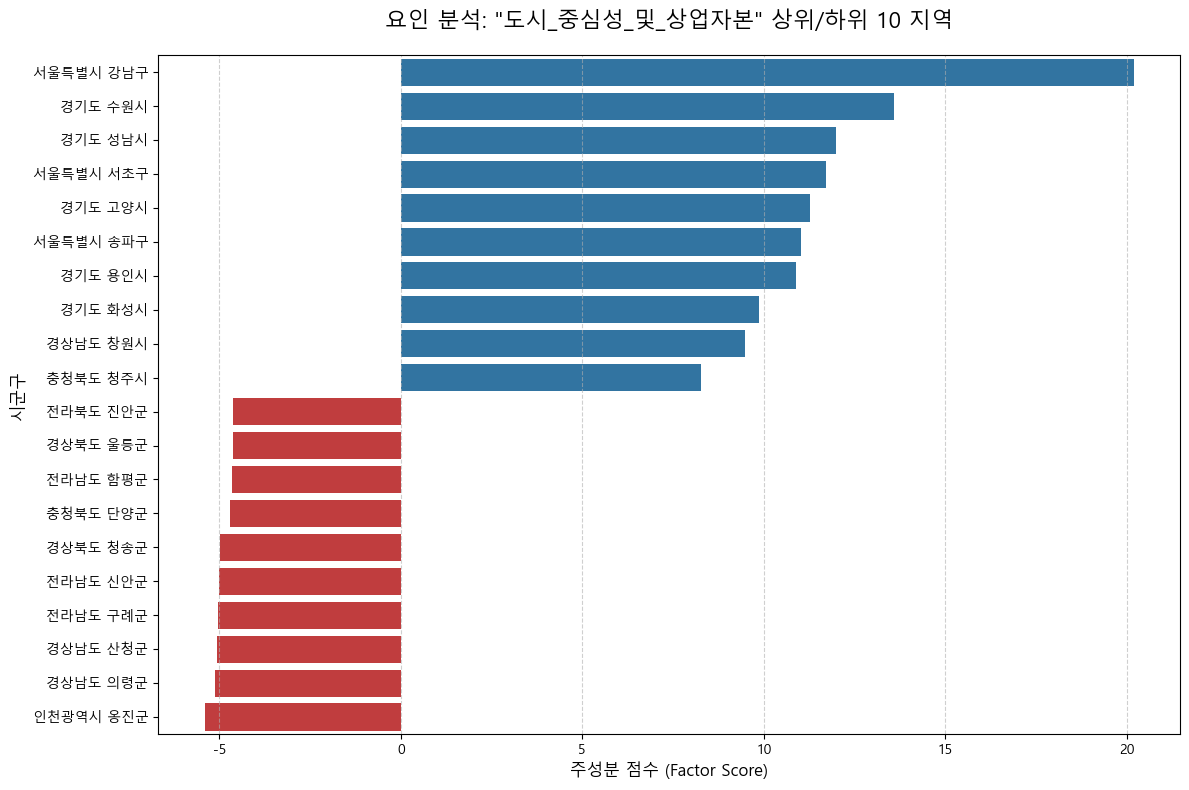

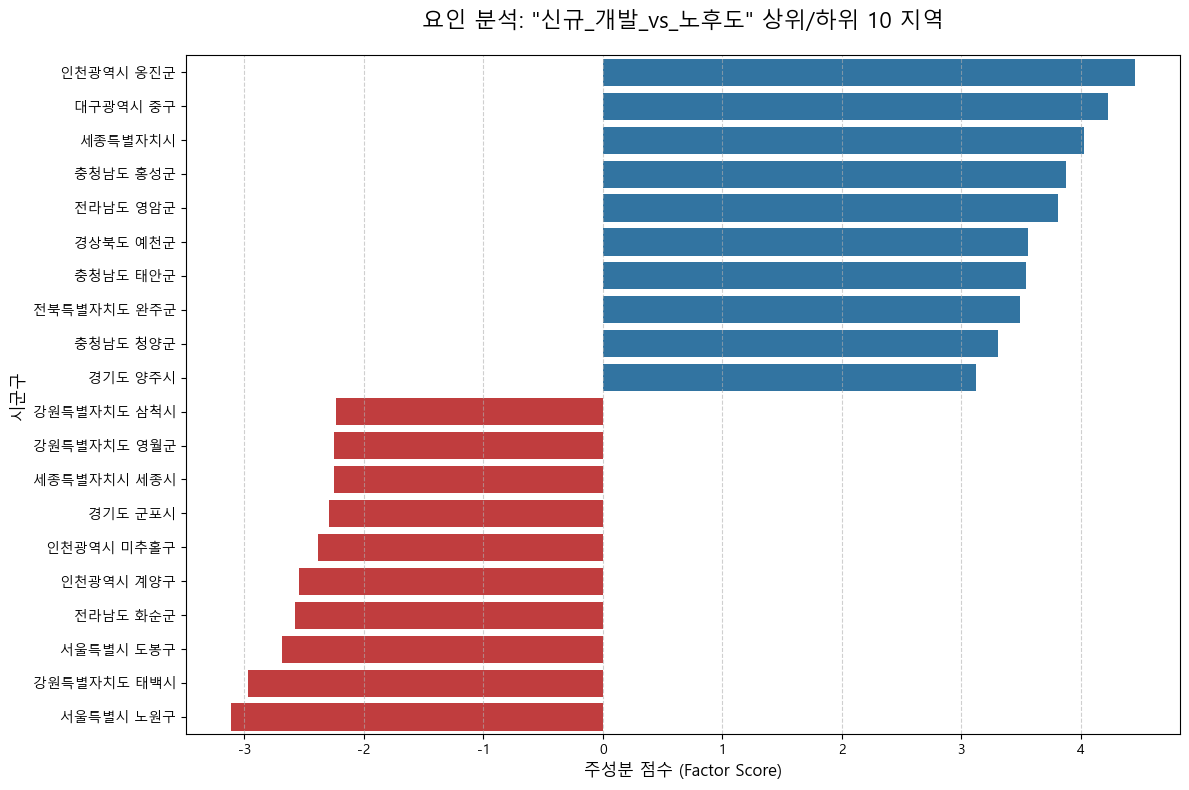

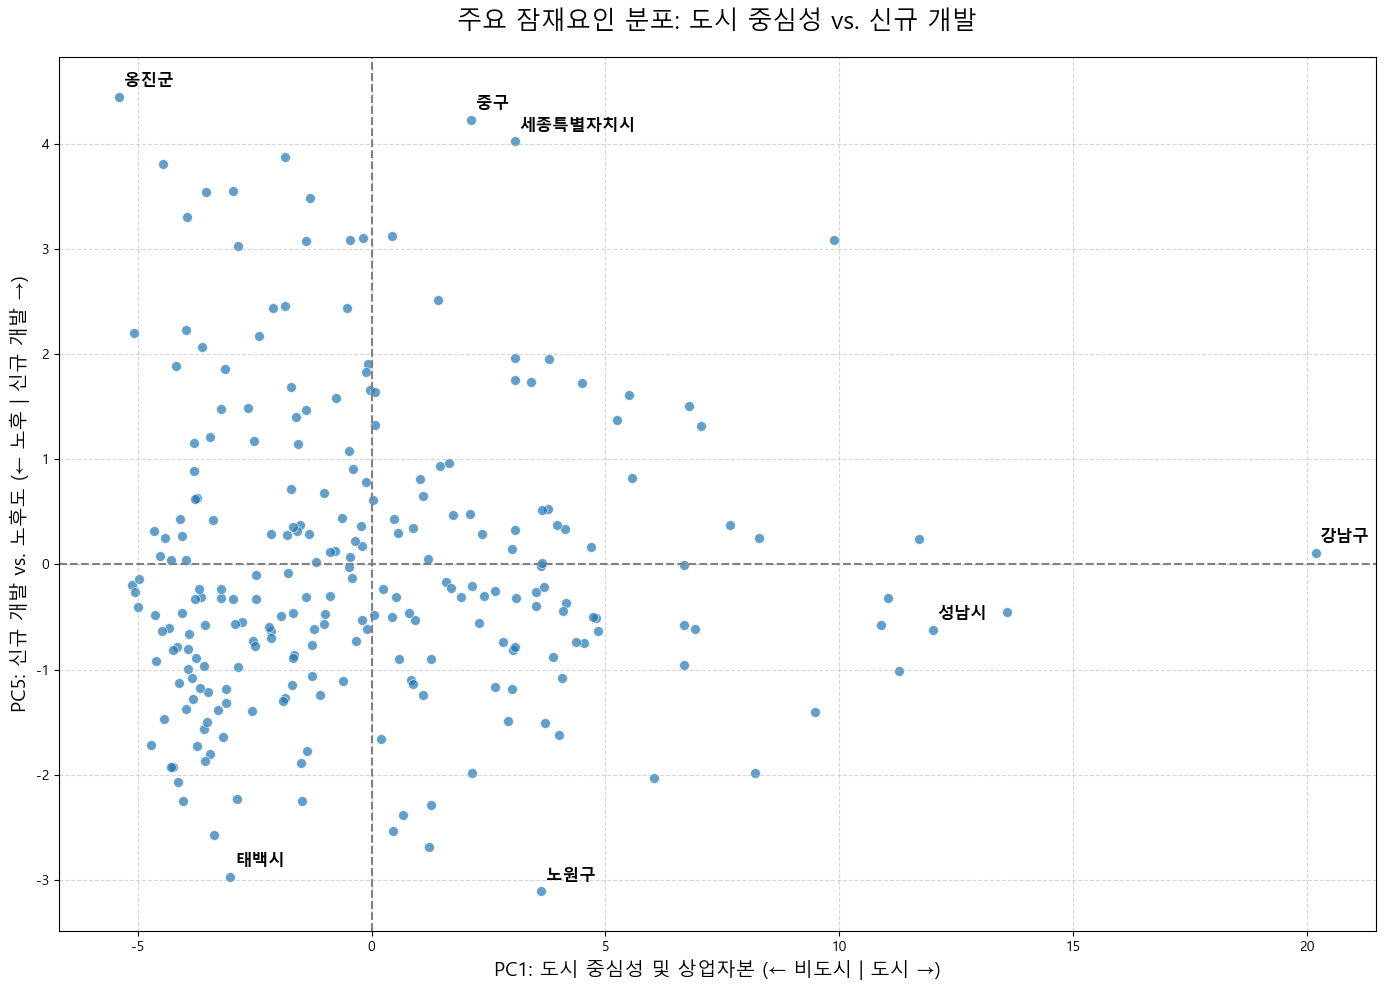

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 이 코드는 이전 단계에서 생성된 
# 주성분 점수 데이터프레임 'df_pca_result'가 현재 환경에 있다고 가정합니다.

# --- 시각화 1: 개별 요인별 상위/하위 지역 막대 그래프 ---

def plot_factor_top_bottom(df, factor_name, top_n=10):
    """특정 요인의 상위/하위 N개 지역을 막대 그래프로 시각화하는 함수"""
    
    # 데이터 정렬 및 상위/하위 N개 선택
    sorted_df = df.sort_values(by=factor_name, ascending=False)
    plot_data = pd.concat([sorted_df.head(top_n), sorted_df.tail(top_n)])
    
    # 시각화
    plt.figure(figsize=(12, 8))
    # 양수/음수를 다른 색으로 표현하기 위한 색상 팔레트
    colors = ['#d62728' if x < 0 else '#1f77b4' for x in plot_data[factor_name]]
    sns.barplot(x=factor_name, y='시군구_병합', data=plot_data, palette=colors)
    
    plt.title(f'요인 분석: "{factor_name}" 상위/하위 {top_n} 지역', fontsize=16, pad=20)
    plt.xlabel('주성분 점수 (Factor Score)', fontsize=12)
    plt.ylabel('시군구', fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# "도시_중심성_및_상업자본" 요인 시각화
plot_factor_top_bottom(df_pca_result, '도시_중심성_및_상업자본')

# "신규_개발_vs_노후도" 요인 시각화
plot_factor_top_bottom(df_pca_result, '신규_개발_vs_노후도')


# --- 시각화 2: 주요 요인 간 관계 분석 (산점도) ---

plt.figure(figsize=(14, 10))

# 산점도 생성
sns.scatterplot(
    data=df_pca_result, 
    x='도시_중심성_및_상업자본', 
    y='신규_개발_vs_노후도',
    alpha=0.7,
    s=50 # 점 크기
)

# 4분면을 나누는 기준선 추가
plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')

# 제목 및 라벨 설정
plt.title('주요 잠재요인 분포: 도시 중심성 vs. 신규 개발', fontsize=18, pad=20)
plt.xlabel('PC1: 도시 중심성 및 상업자본 (← 비도시 | 도시 →)', fontsize=14)
plt.ylabel('PC5: 신규 개발 vs. 노후도 (← 노후 | 신규 개발 →)', fontsize=14)

# 주요 지역 텍스트로 강조 표시
cities_to_label = [
    '서울특별시 강남구', '세종특별자치시', '서울특별시 노원구', '인천광역시 옹진군',
    '경기도 성남시', '대구광역시 중구', '강원특별자치도 태백시'
]
for city in cities_to_label:
    # 해당 도시의 데이터 추출
    city_data = df_pca_result[df_pca_result['시군구_병합'] == city]
    if not city_data.empty:
        plt.text(
            x=city_data['도시_중심성_및_상업자본'].iloc[0] + 0.1,
            y=city_data['신규_개발_vs_노후도'].iloc[0] + 0.1,
            s=city.split(' ')[-1], # 시/군/구 이름만 표시
            fontdict={'size': 12, 'color': 'black', 'weight':'bold'}
        )

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## Phase 2: 구조 기반 클러스터링 - 최적의 지역 유형(K) 찾기

### 분석 목표
우리가 발굴한 8개의 잠재 요인(PC1~PC8) 점수를 기반으로, 대한민국 246개 시군구를 유사한 프로필을 가진 몇 개의 그룹(클러스터)으로 유형화하는 것입니다. 이를 통해 '서울 강남형 도시', '농어촌 관광형 도시', '신규 개발형 도시' 등과 같이 전국을 몇 개의 대표적인 지역 유형으로 분류할 수 있다.

### 분석 방법: K-평균(K-Means) 알고리즘
가장 중요한 질문:

> **"전국 시군구를 몇 개의 유형(K)으로 나누는 것이 가장 적절한가?"**

무작정 5개나 10개로 나누는 것은 분석가의 주관이 개입될 수 있으므로, 데이터 스스로 가장 자연스럽게 나뉘는 최적의 그룹 개수(K)를 찾는 것이 중요하다. 

### 최적의 K를 찾는 방법: 엘보우 방법(Elbow Method)
이를 위해 **엘보우 방법(Elbow Method)** 이라는 통계적 기법을 사용한다. 이 방법은 K를 2부터 15까지 점차 늘려가며 각 클러스터가 얼마나 잘 뭉쳐있는지를 평가한다.

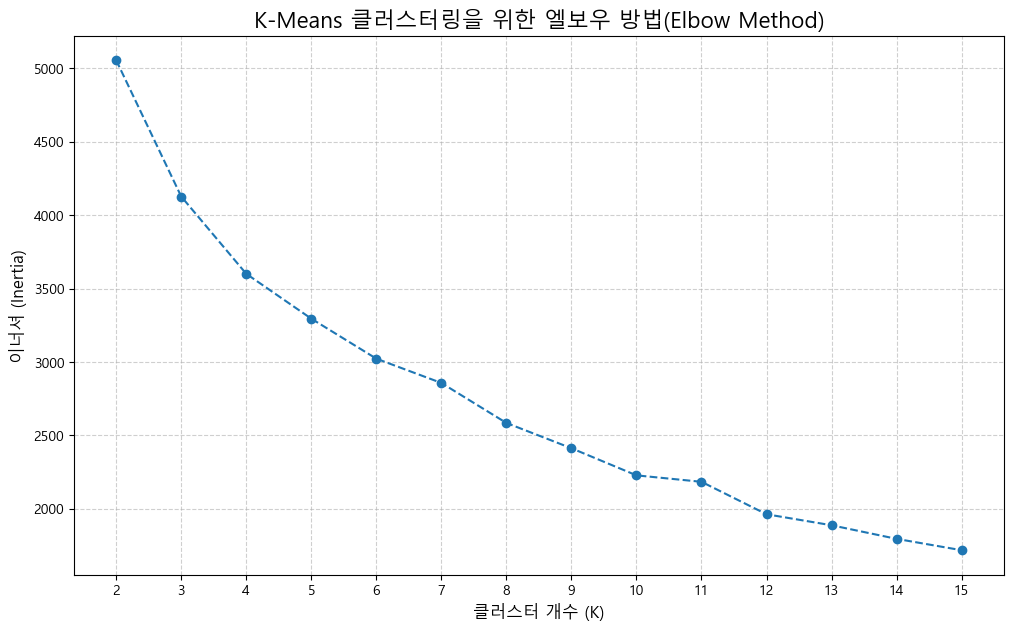

In [15]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import os

# [오류 해결 코드] KMeans의 병렬 처리를 비활성화하여 Windows 환경 충돌 방지
os.environ['OMP_NUM_THREADS'] = '1'

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 이 코드는 이전 단계에서 생성된 
# 주성분 점수 데이터프레임 'df_pca_result'가 현재 환경에 있다고 가정합니다.

# 1. 클러스터링에 사용할 데이터 준비 (시군구 이름 제외)
clustering_data = df_pca_result.drop('시군구_병합', axis=1)

# 2. K값의 범위(2~15)에 대해 K-Means 실행 및 이너셔(Inertia) 계산
inertia = []
K_range = range(2, 16)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(clustering_data)
    inertia.append(kmeans.inertia_) # 이너셔: 각 점과 해당 클러스터 중심까지의 거리 제곱의 합

# 3. 엘보우 방법 시각화
plt.figure(figsize=(12, 7))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.title('K-Means 클러스터링을 위한 엘보우 방법(Elbow Method)', fontsize=16)
plt.xlabel('클러스터 개수 (K)', fontsize=12)
plt.ylabel('이너셔 (Inertia)', fontsize=12)
plt.xticks(K_range)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


- 그래프를 보면, K가 2에서 5로 증가할 때까지는 이너셔 값이 급격하게 떨어진다. 
하지만 K=5 지점을 지나면서부터 곡선의 기울기는 눈에 띄게 완만해진다.
이는 전국 246개 시군구를 5개의 유형으로 분류하는 것이, 너무 단순하지도(K<5) 너무 복잡하지도(K>5) 않으면서 각 그룹의 특성을 가장 잘 설명하는 최적의 균형점임을 의미한다. 따라서, 대한민국 시군구를 5개의 대표적인 유형으로 분류하기로 결정하였다. 

### 클러스터별 잠재 요인 평균 점수 (프로필) ###
      도시_중심성_및_상업자본  고비용_특화_경제  농어촌_광역_관광  복지_구조(노인_중심)  신규_개발_vs_노후도  \
클러스터                                                                    
0         10.804286   0.416652   3.363703     -0.163861     -0.152112   
1         -3.708218   1.030340   1.009853      0.048177     -0.249606   
2         -0.323371  -0.729656  -0.649157      0.766086      0.138480   
3          3.903733   0.702483  -1.095116      0.128279     -0.050169   
4         -0.665883  -2.515537  -0.650213     -2.947181      0.522905   

      지역_내수_상권   사회적_취약성  에너지_소비_계절성  
클러스터                                  
0    -0.673091  0.064346    0.077191  
1    -0.299201  0.126892   -0.006816  
2     0.379435 -0.258169   -0.103221  
3     0.310698 -0.095788   -0.014804  
4    -0.593750  0.630391    0.363235  


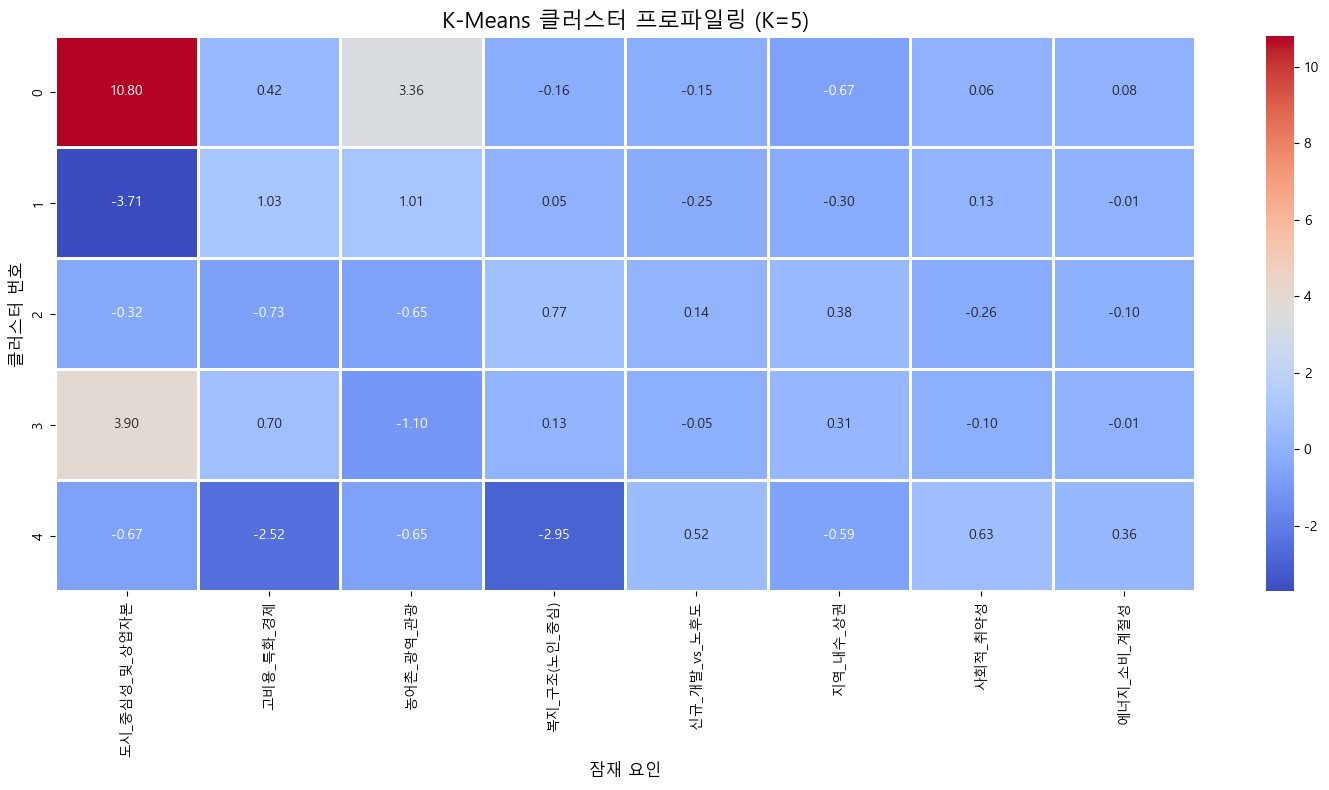


### 클러스터별 지역 수 및 대표 지역 ###

--- 클러스터 0 (총 13개 지역) ---
  - 대표 지역: 경기도 고양시, 경기도 부천시, 경기도 성남시, 경기도 수원시, 경기도 용인시

--- 클러스터 1 (총 78개 지역) ---
  - 대표 지역: 강원특별자치도 고성군, 강원특별자치도 삼척시, 강원특별자치도 양구군, 강원특별자치도 양양군, 강원특별자치도 영월군

--- 클러스터 2 (총 82개 지역) ---
  - 대표 지역: 강원특별자치도 강릉시, 강원특별자치도 동해시, 강원특별자치도 속초시, 강원특별자치도 원주시, 강원특별자치도 춘천시

--- 클러스터 3 (총 49개 지역) ---
  - 대표 지역: 경기도 광명시, 경기도 김포시, 경기도 남양주시, 경기도 시흥시, 경기도 안산시

--- 클러스터 4 (총 24개 지역) ---
  - 대표 지역: 경상북도 경주시, 경상북도 고령군, 경상북도 군위군, 경상북도 김천시, 경상북도 문경시


In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os

#  KMeans의 병렬 처리를 비활성화하여 Windows 환경 충돌 방지
os.environ['OMP_NUM_THREADS'] = '1'

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 1. 최적의 K=5로 K-Means 클러스터링 실행
k = 5
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clustering_data = df_pca_result.drop('시군구_병합', axis=1)
kmeans.fit(clustering_data)

# 2. 원본 데이터에 클러스터 라벨 추가
df_clustered = df_pca_result.copy()
df_clustered['클러스터'] = kmeans.labels_

# 3. 각 클러스터의 프로파일링 (잠재 요인 점수 평균 계산)
# [수정된 부분] numeric_only=True를 추가하여 숫자 컬럼에 대해서만 평균 계산
cluster_profiles = df_clustered.groupby('클러스터').mean(numeric_only=True)
print("### 클러스터별 잠재 요인 평균 점수 (프로필) ###")
print(cluster_profiles)

# 4. 클러스터 프로필 히트맵 시각화
plt.figure(figsize=(15, 8))
sns.heatmap(cluster_profiles, cmap='coolwarm', annot=True, fmt='.2f', linewidths=1)
plt.title('K-Means 클러스터 프로파일링 (K=5)', fontsize=16)
plt.xlabel('잠재 요인', fontsize=12)
plt.ylabel('클러스터 번호', fontsize=12)
plt.tight_layout()
plt.show()

# 5. 각 클러스터에 속한 지역 수 및 예시 확인
print("\n### 클러스터별 지역 수 및 대표 지역 ###")
for i in range(k):
    cluster_cities = df_clustered[df_clustered['클러스터'] == i]['시군구_병합']
    print(f"\n--- 클러스터 {i} (총 {len(cluster_cities)}개 지역) ---")
    print(f"  - 대표 지역: {', '.join(cluster_cities.head(5).tolist())}")


## 클러스터 프로파일링 및 지역 유형 명명

### 클러스터별 특성 분석 결과

| 클러스터 | 대표 지역 | 핵심 프로필 | 최종 유형 명칭 |
|---------|-----------|-------------|----------------|
| 0 | 경기도 주요 도시 (수원, 성남 등) | 압도적인 도시 중심성/상업자본, 높은 광역성 | 초거대도시 / 수도권 중심 (13개) |
| 1 | 강원/경북 등 군 단위 지역 | 도시 중심성/상업자본이 매우 낮고, 고비용/특화 경제 및 농어촌/관광 특성이 강함 | 농어촌 관광 복합형 (78개) |
| 2 | 강원/충북/전북 등 중소도시 | 모든 요인에서 뚜렷한 특징이 없이 평균에 가까움. 내수 상권, 노인 복지 특성이 약간 있음 | 전국 표준형 중소도시 (82개) |
| 3 | 경기도 외곽/신도시 (김포, 시흥 등) | 높은 도시 중심성(클러스터 0 다음)을 가지지만, 초거대도시보다는 낮음 | 수도권 위성도시 / 거점 도시 (49개) |
| 4 | 경북/경남 등 일부 시/군 지역 | 고비용/특화 경제와 노인복지 구조 점수가 매우 낮음. 사회적 취약성이 높고, 신규 개발 특성을 보임 | 저비용/성장 잠재형 도시 (24개) |

### 클러스터링 결과 해석

K-Means 클러스터링을 통해 전국 246개 시군구를 5개의 뚜렷한 유형으로 분류할 수 있었다. 각 클러스터는 잠재 요인 분석에서 도출된 5개 차원(도시 중심성/상업자본, 고비용/특화 경제, 농어촌/관광, 내수 상권/노인 복지, 광역성)에서 고유한 특성을 보인다.

- **클러스터 0 (초거대도시/수도권 중심)**: 가장 적은 수(13개)이지만 경제적 중심성이 압도적으로 높은 지역들
- **클러스터 1 (농어촌 관광 복합형)**: 가장 많은 수(78개)로 전통적인 농어촌 특성과 관광 자원을 보유한 지역들  
- **클러스터 2 (전국 표준형 중소도시)**: 두 번째로 많은 수(82개)로 평균적 특성을 가진 중소도시들
- **클러스터 3 (수도권 위성도시/거점 도시)**: 수도권 확장과 지방 거점 역할을 하는 중간 규모 도시들(49개)
- **클러스터 4 (저비용/성장 잠재형)**: 상대적으로 개발 수준이 낮지만 성장 잠재력을 가진 지역들(24개)


두 잠재 요인, PC1('도시 중심성 및 상업자본')과 PC2('고비용/특화 경제')를 각각 x축과 y축으로 설정하고 246개 시군구를 점으로 표현

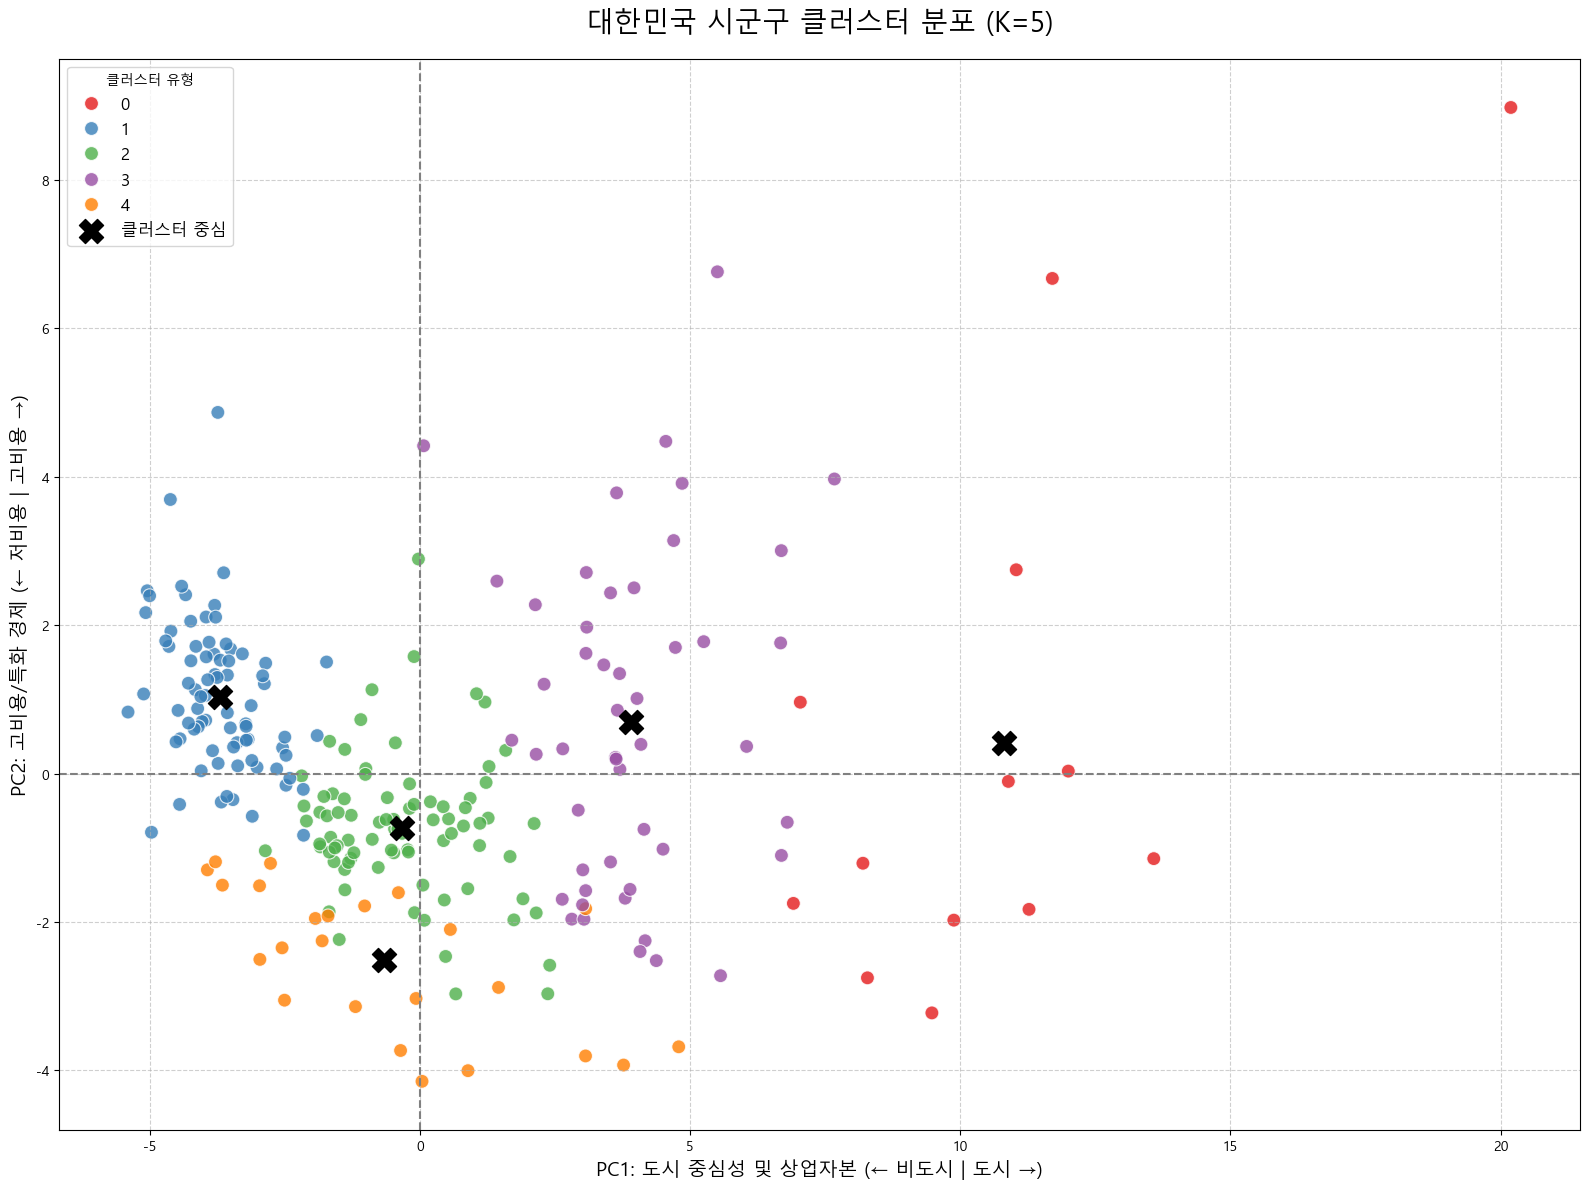

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# KMeans의 병렬 처리를 비활성화하여 Windows 환경 충돌 방지
os.environ['OMP_NUM_THREADS'] = '1'

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


# 1. 클러스터 시각화를 위한 데이터 준비
# 클러스터 이름을 범주형으로 만들어 순서를 고정 (그래프 범례 순서 유지)
df_clustered['클러스터'] = pd.Categorical(df_clustered['클러스터'])

# 2. 산점도 시각화
plt.figure(figsize=(16, 12))
sns.scatterplot(
    data=df_clustered,
    x='도시_중심성_및_상업자본',
    y='고비용_특화_경제',
    hue='클러스터',
    palette='Set1', # 색상 팔레트
    s=100, # 점 크기
    alpha=0.8,
    legend='full'
)

# 각 클러스터의 중심점(Centroid) 표시
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0], # PC1 좌표
    centroids[:, 1], # PC2 좌표
    s=300, 
    c='black', 
    marker='X', 
    label='클러스터 중심'
)

# 제목 및 라벨 설정
plt.title('대한민국 시군구 클러스터 분포 (K=5)', fontsize=20, pad=20)
plt.xlabel('PC1: 도시 중심성 및 상업자본 (← 비도시 | 도시 →)', fontsize=14)
plt.ylabel('PC2: 고비용/특화 경제 (← 저비용 | 고비용 →)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='클러스터 유형', fontsize=12)
plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')

plt.tight_layout()
plt.show()


## 클러스터 분석 결과 해석

### 클러스터별 특성 분석

#### 클러스터 0 (빨강): 독보적인 대한민국 최상위 도시
- **위치**: 다른 모든 도시와 압도적인 격차를 두고 x축의 가장 오른쪽에 존재
- **해석**: 이들은 명실상부한 대한민국의 심장부이다. '도시 중심성'이라는 측면에서 다른 모든 지역을 초월하는 독보적인 위치에 있으며, 이는 다른 어떤 요인보다 이 도시들의 정체성을 강력하게 규정함을 의미한다.

#### 클러스터 3 (보라): 고비용/고기능, 수도권 및 거점 도시
- **위치**: 오른쪽 위 (1사분면)에 주로 분포
- **해석**: 이들은 '도시'이면서(x>0) '고비용/특화 경제'(y>0)의 특성을 동시에 가진, 잘 발달된 주요 도시 그룹이다. 클러스터 0보다는 중심성이 약하지만, 여전히 대한민국의 핵심적인 경제 활동과 주거 수요를 담당하는 지역들이다.

#### 클러스터 1 (파랑): 비도시권의 고비용/특화 지역 (관광/특수산업)
- **위치**: 왼쪽 위 (2사분면)에 밀집
- **해석**: 이 그룹의 발견이 이번 분석의 백미 중 하나이다. 이들은 '도시'는 아니지만(x<0), '고비용/특화 경제'(y>0)의 특징을 보인다. 이는 대도시가 아님에도 불구하고 유명 관광지, 특수 산업, 또는 높은 토지 가치로 인해 생활비가 높거나 경제가 특화된 지역들(예: 제주, 강원 주요 관광지)임을 완벽하게 시각화한다.

#### 클러스터 4 (주황): 저비용/비특화 지역
- **위치**: 왼쪽 아래 (3사분면)에 주로 분포
- **해석**: 클러스터 3과 정반대의 특성을 가진다. '도시'가 아니며(x<0), 생활비가 저렴하고 경제가 특정 분야에 특화되지 않은(y<0) 지역들이다. 전형적인 농어촌 또는 지방 소도시의 특성을 나타낸다.

#### 클러스터 2 (초록): 대한민국의 표준, 전국 평균형 중소도시
- **위치**: 그래프의 중심(0,0) 주변에 가장 넓게 분포
- **해석**: 이들은 모든 특성에서 극단에 치우치지 않은 '대한민국의 평균'과 같은 지역들이다. 대한민국에서 가장 많은 수를 차지하는 이 그룹은, 다른 모든 유형의 도시들을 비교하고 평가하는 기준점(Baseline) 역할을 한다.


## Phase 3.1: 생활비 동인 분석 - 클러스터별 회귀분석
 
### 분석 목표
"생활비('주거_평균_평당_가격')에 영향을 미치는 요인은 5개의 도시 유형별로 어떻게 다른가?"라는 질문에 통계적으로 답변
 
### 분석 과정
1. **데이터 통합**: 분석에 필요한 모든 데이터(원본 생활비, 8개 잠재 요인, 클러스터 라벨)를 하나의 데이터프레임으로 통합
2. **모델링**: 5개 클러스터 각각에 대해, 8개 잠재 요인이 생활비에 미치는 영향을 분석하는 다중 회귀분석 모델 구축 
3. **결과 제시**: 각 클러스터별 모델의 분석 결과를 통계 요약표와 함께 제시 
#### 주요 지표 해석
- **R-squared**: 모델이 생활비 변동을 얼마나 잘 설명하는지 (설명력)
- **coef**: 각 요인이 생활비에 미치는 영향의 크기와 방향 (+/-)
- **P>|t|**: 각 요인의 영향이 통계적으로 유의미한지 (일반적으로 0.05 미만일 때 유의미)



In [19]:
import pandas as pd
import statsmodels.api as sm
import os

# KMeans의 병렬 처리를 비활성화하여 Windows 환경 충돌 방지
os.environ['OMP_NUM_THREADS'] = '1'


# 1. 분석용 데이터프레임 생성
# 종속변수인 '주거_평균_평당_가격'을 원본 df에서 가져와 결합
regression_df = pd.merge(
    df_clustered,
    df[['시군구_병합', '주거_평균_평당_가격']],
    on='시군구_병합'
)

# 2. 클러스터별 회귀분석 수행
# 독립변수(X)는 8개의 잠재 요인
independent_vars = [
    '도시_중심성_및_상업자본', '고비용_특화_경제', '농어촌_광역_관광',
    '복지_구조(노인_중심)', '신규_개발_vs_노후도', '지역_내수_상권',
    '사회적_취약성', '에너지_소비_계절성'
]
# 종속변수(y)는 생활비 지표
dependent_var = '주거_평균_평당_가격'

# 결과를 저장할 딕셔너리
regression_results = {}

for i in range(5): # 5개 클러스터에 대해 반복
    cluster_data = regression_df[regression_df['클러스터'] == i]
    
    X = cluster_data[independent_vars]
    y = cluster_data[dependent_var]
    
    # 회귀분석을 위해 상수항(intercept) 추가
    X = sm.add_constant(X)
    
    # OLS 모델 학습
    model = sm.OLS(y, X).fit()
    regression_results[i] = model

# 3. 결과 출력 및 해석
print("### 클러스터별 생활비 결정요인 회귀분석 결과 ###")
for i, result in regression_results.items():
    cluster_type_names = {
        0: "초거대도시 / 수도권 중심",
        1: "농어촌 관광 복합형",
        2: "전국 표준형 중소도시",
        3: "수도권 위성도시 / 거점 도시",
        4: "저비용/성장 잠재형 도시"
    }
    print("\n" + "="*80)
    print(f"### 클러스터 {i}: {cluster_type_names[i]} ({len(regression_df[regression_df['클러스터']==i])}개 지역) ###")
    print("="*80)
    print(result.summary())
    print("\n[해석 요약]")
    
    # R-squared 해석
    r_squared = result.rsquared_adj
    print(f"- 모델 설명력 (Adj. R-squared): {r_squared:.2f}")
    print(f"  > 이 모델은 해당 클러스터 생활비 변동의 약 {r_squared:.0%}를 설명합니다.")
    
    # 유의미한 변수 해석
    significant_vars = result.pvalues[result.pvalues < 0.05].index.tolist()
    if 'const' in significant_vars:
        significant_vars.remove('const')
        
    if not significant_vars:
        print("- 통계적으로 유의미한 생활비 결정요인이 없습니다.")
    else:
        print("- 주요 생활비 결정요인 (p < 0.05):")
        for var in significant_vars:
            coef = result.params[var]
            direction = "증가시키는" if coef > 0 else "감소시키는"
            print(f"  * {var}: 이 요인이 1 증가할 때마다 생활비(평당 가격)를 평균 {coef:.2f} 만큼 {direction} 핵심 요인입니다.")


### 클러스터별 생활비 결정요인 회귀분석 결과 ###

### 클러스터 0: 초거대도시 / 수도권 중심 (13개 지역) ###
                            OLS Regression Results                            
Dep. Variable:            주거_평균_평당_가격   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     44.34
Date:                Sun, 22 Jun 2025   Prob (F-statistic):            0.00122
Time:                        10:11:54   Log-Likelihood:                 4.3811
No. Observations:                  13   AIC:                             9.238
Df Residuals:                       4   BIC:                             14.32
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

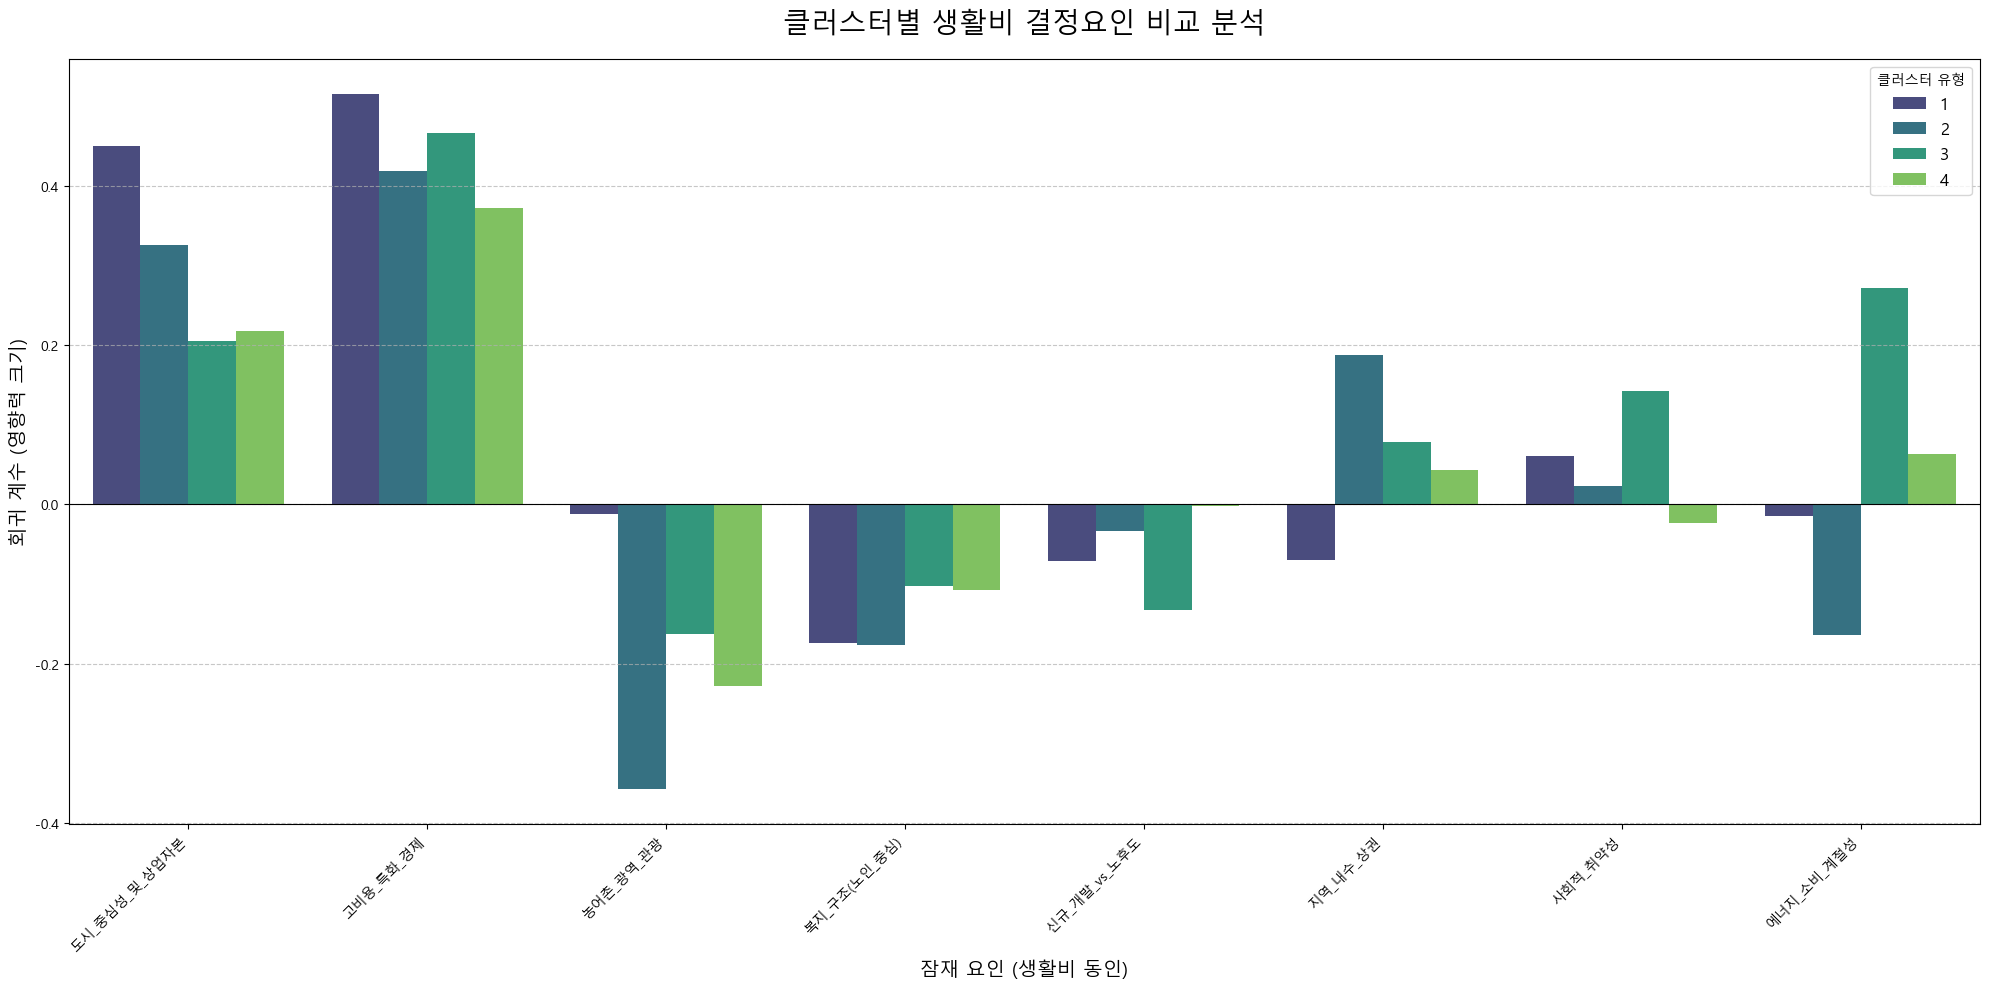

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 이 코드는 이전 단계에서 생성된 회귀분석 결과 객체
# 'regression_results'가 현재 환경에 있다고 가정합니다.

# 1. 시각화를 위한 데이터프레임 재구성
plot_data_list = []
# 클러스터 0을 제외한 1, 2, 3, 4에 대해 반복
for i in range(1, 5): 
    result = regression_results[i]
    
    # 계수(params)와 p-value를 하나의 데이터프레임으로 결합
    temp_df = pd.DataFrame({
        'Factor': result.params.index,
        'Coefficient': result.params.values,
        'p_value': result.pvalues.values
    })
    
    # 상수항(const) 제외
    temp_df = temp_df[temp_df['Factor'] != 'const']
    
    # 클러스터 번호 추가
    temp_df['클러스터'] = str(i) # 범주형으로 다루기 위해 문자열로 변환
    plot_data_list.append(temp_df)

# 모든 클러스터 데이터를 하나로 합침
plot_df = pd.concat(plot_data_list, ignore_index=True)

# 2. 그룹화된 막대 그래프 시각화
plt.figure(figsize=(20, 10))
sns.barplot(
    data=plot_df,
    x='Factor',
    y='Coefficient',
    hue='클러스터',
    palette='viridis' # 색상 팔레트
)

# 그래프 제목 및 라벨 설정
plt.title('클러스터별 생활비 결정요인 비교 분석', fontsize=20, pad=20)
plt.xlabel('잠재 요인 (생활비 동인)', fontsize=14)
plt.ylabel('회귀 계수 (영향력 크기)', fontsize=14)
plt.xticks(rotation=45, ha='right') # x축 라벨 회전
plt.axhline(0, color='black', linewidth=0.8) # y=0 기준선
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='클러스터 유형', fontsize=12)

plt.tight_layout()
plt.show()
